In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# LSTM Experiment

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch_geometric.data import Batch

In [16]:
train_npz = np.load('../../train.npz')
train_data = train_npz['data']
test_npz  = np.load('../../test_input.npz')
test_data  = test_npz['data']

In [17]:
print(train_data.shape, test_data.shape)

# Split once for later use
X_train = train_data[..., :50, :]
Y_train = train_data[:, 0, 50:, :2]

(10000, 50, 110, 6) (2100, 50, 50, 6)


In [18]:
import sys
sys.path.append('..')
from TrajectoryDataset import TrajectoryDatasetTrain, TrajectoryDatasetTest
from utils import train_model

sys.path.append('../..')
from models.lstm import LSTMModel

In [19]:
torch.manual_seed(251)
np.random.seed(42)

scale = 5.0

N = len(train_data)
val_size = int(0.05 * N)
train_size = N - val_size

train_dataset = TrajectoryDatasetTrain(train_data[:train_size], scale=scale, augment=True)
val_dataset = TrajectoryDatasetTrain(train_data[train_size:], scale=scale, augment=False)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=lambda x: Batch.from_data_list(x))
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=lambda x: Batch.from_data_list(x))

# Set device for training speedup
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using Apple Silicon GPU")
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA GPU")
else:
    device = torch.device('cpu')

Using Apple Silicon GPU


In [7]:
model = LSTMModel()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.25) # You can try different schedulers
early_stopping_patience = 10
criterion = nn.MSELoss()

In [8]:
model = model.to(device)
train_model(
    model, 
    train_dataloader, 
    val_dataloader, 
    device, 
    optimizer, 
    criterion, 
    scheduler, 
    early_stopping_patience,
    "lstm_weights"
)

Epoch:   1%|          | 1/100 [00:05<08:55,  5.41s/epoch]

Epoch 000 | Learning rate 0.001000 | train normalized MSE   4.0937 | val normalized MSE   1.4773, | val unnormalized MAE   3.4265 | val unnormalized MSE  36.9317


Epoch:   2%|▏         | 2/100 [00:09<07:49,  4.79s/epoch]

Epoch 001 | Learning rate 0.001000 | train normalized MSE   1.0004 | val normalized MSE   0.8170, | val unnormalized MAE   2.3682 | val unnormalized MSE  20.4262


Epoch:   3%|▎         | 3/100 [00:13<07:18,  4.52s/epoch]

Epoch 002 | Learning rate 0.001000 | train normalized MSE   0.8009 | val normalized MSE   0.8142, | val unnormalized MAE   2.4157 | val unnormalized MSE  20.3549


Epoch:   4%|▍         | 4/100 [00:18<07:18,  4.57s/epoch]

Epoch 003 | Learning rate 0.001000 | train normalized MSE   0.7271 | val normalized MSE   0.6523, | val unnormalized MAE   2.1465 | val unnormalized MSE  16.3082


Epoch:   5%|▌         | 5/100 [00:22<06:54,  4.37s/epoch]

Epoch 004 | Learning rate 0.001000 | train normalized MSE   0.6753 | val normalized MSE   0.6661, | val unnormalized MAE   2.0966 | val unnormalized MSE  16.6537


Epoch:   6%|▌         | 6/100 [00:26<06:35,  4.21s/epoch]

Epoch 005 | Learning rate 0.001000 | train normalized MSE   0.6249 | val normalized MSE   0.5905, | val unnormalized MAE   2.1141 | val unnormalized MSE  14.7635


Epoch:   7%|▋         | 7/100 [00:30<06:20,  4.09s/epoch]

Epoch 006 | Learning rate 0.001000 | train normalized MSE   0.5946 | val normalized MSE   0.5839, | val unnormalized MAE   1.8623 | val unnormalized MSE  14.5978


Epoch:   8%|▊         | 8/100 [00:34<06:07,  3.99s/epoch]

Epoch 007 | Learning rate 0.001000 | train normalized MSE   0.5702 | val normalized MSE   0.5503, | val unnormalized MAE   1.8578 | val unnormalized MSE  13.7583


Epoch:   9%|▉         | 9/100 [00:38<06:04,  4.00s/epoch]

Epoch 008 | Learning rate 0.001000 | train normalized MSE   0.5491 | val normalized MSE   0.5158, | val unnormalized MAE   1.7614 | val unnormalized MSE  12.8948


Epoch:  10%|█         | 10/100 [00:42<06:05,  4.07s/epoch]

Epoch 009 | Learning rate 0.001000 | train normalized MSE   0.5205 | val normalized MSE   0.5133, | val unnormalized MAE   1.8279 | val unnormalized MSE  12.8334


Epoch:  11%|█         | 11/100 [00:46<06:10,  4.16s/epoch]

Epoch 010 | Learning rate 0.001000 | train normalized MSE   0.5137 | val normalized MSE   0.4996, | val unnormalized MAE   1.9102 | val unnormalized MSE  12.4901


Epoch:  12%|█▏        | 12/100 [00:50<06:07,  4.18s/epoch]

Epoch 011 | Learning rate 0.001000 | train normalized MSE   0.4960 | val normalized MSE   0.4467, | val unnormalized MAE   1.7077 | val unnormalized MSE  11.1663


Epoch:  13%|█▎        | 13/100 [00:55<06:04,  4.19s/epoch]

Epoch 012 | Learning rate 0.001000 | train normalized MSE   0.4907 | val normalized MSE   0.4789, | val unnormalized MAE   1.7062 | val unnormalized MSE  11.9723


Epoch:  14%|█▍        | 14/100 [00:59<05:56,  4.15s/epoch]

Epoch 013 | Learning rate 0.001000 | train normalized MSE   0.4766 | val normalized MSE   0.4770, | val unnormalized MAE   1.6816 | val unnormalized MSE  11.9244


Epoch:  15%|█▌        | 15/100 [01:03<05:44,  4.06s/epoch]

Epoch 014 | Learning rate 0.001000 | train normalized MSE   0.4675 | val normalized MSE   0.4999, | val unnormalized MAE   1.8314 | val unnormalized MSE  12.4965


Epoch:  16%|█▌        | 16/100 [01:07<05:39,  4.04s/epoch]

Epoch 015 | Learning rate 0.001000 | train normalized MSE   0.4601 | val normalized MSE   0.4735, | val unnormalized MAE   1.7874 | val unnormalized MSE  11.8366


Epoch:  17%|█▋        | 17/100 [01:11<05:33,  4.02s/epoch]

Epoch 016 | Learning rate 0.001000 | train normalized MSE   0.4593 | val normalized MSE   0.4472, | val unnormalized MAE   1.7509 | val unnormalized MSE  11.1793


Epoch:  18%|█▊        | 18/100 [01:14<05:26,  3.98s/epoch]

Epoch 017 | Learning rate 0.001000 | train normalized MSE   0.4437 | val normalized MSE   0.4518, | val unnormalized MAE   1.6926 | val unnormalized MSE  11.2940


Epoch:  19%|█▉        | 19/100 [01:18<05:20,  3.95s/epoch]

Epoch 018 | Learning rate 0.001000 | train normalized MSE   0.4379 | val normalized MSE   0.4572, | val unnormalized MAE   1.7003 | val unnormalized MSE  11.4304


Epoch:  20%|██        | 20/100 [01:22<05:16,  3.96s/epoch]

Epoch 019 | Learning rate 0.000250 | train normalized MSE   0.4396 | val normalized MSE   0.4243, | val unnormalized MAE   1.6033 | val unnormalized MSE  10.6083


Epoch:  21%|██        | 21/100 [01:27<05:24,  4.11s/epoch]

Epoch 020 | Learning rate 0.000250 | train normalized MSE   0.3962 | val normalized MSE   0.3967, | val unnormalized MAE   1.5210 | val unnormalized MSE   9.9178


Epoch:  22%|██▏       | 22/100 [01:31<05:33,  4.27s/epoch]

Epoch 021 | Learning rate 0.000250 | train normalized MSE   0.3866 | val normalized MSE   0.3943, | val unnormalized MAE   1.5110 | val unnormalized MSE   9.8573


Epoch:  23%|██▎       | 23/100 [01:36<05:24,  4.22s/epoch]

Epoch 022 | Learning rate 0.000250 | train normalized MSE   0.3862 | val normalized MSE   0.3948, | val unnormalized MAE   1.5492 | val unnormalized MSE   9.8705


Epoch:  24%|██▍       | 24/100 [01:40<05:24,  4.28s/epoch]

Epoch 023 | Learning rate 0.000250 | train normalized MSE   0.3832 | val normalized MSE   0.3888, | val unnormalized MAE   1.5251 | val unnormalized MSE   9.7190


Epoch:  25%|██▌       | 25/100 [01:44<05:26,  4.35s/epoch]

Epoch 024 | Learning rate 0.000250 | train normalized MSE   0.3820 | val normalized MSE   0.4041, | val unnormalized MAE   1.5830 | val unnormalized MSE  10.1013


Epoch:  26%|██▌       | 26/100 [01:49<05:31,  4.48s/epoch]

Epoch 025 | Learning rate 0.000250 | train normalized MSE   0.3792 | val normalized MSE   0.3806, | val unnormalized MAE   1.4829 | val unnormalized MSE   9.5146


Epoch:  27%|██▋       | 27/100 [01:54<05:29,  4.52s/epoch]

Epoch 026 | Learning rate 0.000250 | train normalized MSE   0.3798 | val normalized MSE   0.3888, | val unnormalized MAE   1.5184 | val unnormalized MSE   9.7210


Epoch:  28%|██▊       | 28/100 [01:58<05:26,  4.53s/epoch]

Epoch 027 | Learning rate 0.000250 | train normalized MSE   0.3755 | val normalized MSE   0.3807, | val unnormalized MAE   1.4871 | val unnormalized MSE   9.5185


Epoch:  29%|██▉       | 29/100 [02:03<05:20,  4.51s/epoch]

Epoch 028 | Learning rate 0.000250 | train normalized MSE   0.3757 | val normalized MSE   0.3810, | val unnormalized MAE   1.4992 | val unnormalized MSE   9.5245


Epoch:  30%|███       | 30/100 [02:08<05:18,  4.55s/epoch]

Epoch 029 | Learning rate 0.000250 | train normalized MSE   0.3747 | val normalized MSE   0.3842, | val unnormalized MAE   1.5354 | val unnormalized MSE   9.6052


Epoch:  31%|███       | 31/100 [02:12<05:16,  4.59s/epoch]

Epoch 030 | Learning rate 0.000250 | train normalized MSE   0.3731 | val normalized MSE   0.3792, | val unnormalized MAE   1.4862 | val unnormalized MSE   9.4801


Epoch:  32%|███▏      | 32/100 [02:17<05:17,  4.67s/epoch]

Epoch 031 | Learning rate 0.000250 | train normalized MSE   0.3737 | val normalized MSE   0.3800, | val unnormalized MAE   1.5218 | val unnormalized MSE   9.5005


Epoch:  33%|███▎      | 33/100 [02:22<05:11,  4.65s/epoch]

Epoch 032 | Learning rate 0.000250 | train normalized MSE   0.3712 | val normalized MSE   0.3912, | val unnormalized MAE   1.5100 | val unnormalized MSE   9.7812


Epoch:  34%|███▍      | 34/100 [02:26<04:58,  4.52s/epoch]

Epoch 033 | Learning rate 0.000250 | train normalized MSE   0.3689 | val normalized MSE   0.3889, | val unnormalized MAE   1.5226 | val unnormalized MSE   9.7235


Epoch:  35%|███▌      | 35/100 [02:30<04:48,  4.43s/epoch]

Epoch 034 | Learning rate 0.000250 | train normalized MSE   0.3707 | val normalized MSE   0.3884, | val unnormalized MAE   1.4837 | val unnormalized MSE   9.7093


Epoch:  36%|███▌      | 36/100 [02:35<04:43,  4.43s/epoch]

Epoch 035 | Learning rate 0.000250 | train normalized MSE   0.3650 | val normalized MSE   0.3813, | val unnormalized MAE   1.5222 | val unnormalized MSE   9.5315


Epoch:  37%|███▋      | 37/100 [02:39<04:44,  4.51s/epoch]

Epoch 036 | Learning rate 0.000250 | train normalized MSE   0.3665 | val normalized MSE   0.3910, | val unnormalized MAE   1.5855 | val unnormalized MSE   9.7755


Epoch:  38%|███▊      | 38/100 [02:44<04:37,  4.48s/epoch]

Epoch 037 | Learning rate 0.000250 | train normalized MSE   0.3682 | val normalized MSE   0.3781, | val unnormalized MAE   1.5051 | val unnormalized MSE   9.4520


Epoch:  39%|███▉      | 39/100 [02:48<04:28,  4.40s/epoch]

Epoch 038 | Learning rate 0.000250 | train normalized MSE   0.3649 | val normalized MSE   0.3879, | val unnormalized MAE   1.5430 | val unnormalized MSE   9.6976


Epoch:  40%|████      | 40/100 [02:53<04:32,  4.54s/epoch]

Epoch 039 | Learning rate 0.000063 | train normalized MSE   0.3655 | val normalized MSE   0.3861, | val unnormalized MAE   1.5035 | val unnormalized MSE   9.6517


Epoch:  41%|████      | 41/100 [02:58<04:32,  4.62s/epoch]

Epoch 040 | Learning rate 0.000063 | train normalized MSE   0.3587 | val normalized MSE   0.3763, | val unnormalized MAE   1.4597 | val unnormalized MSE   9.4085


Epoch:  42%|████▏     | 42/100 [03:02<04:27,  4.62s/epoch]

Epoch 041 | Learning rate 0.000063 | train normalized MSE   0.3515 | val normalized MSE   0.3790, | val unnormalized MAE   1.4686 | val unnormalized MSE   9.4740


Epoch:  43%|████▎     | 43/100 [03:07<04:29,  4.72s/epoch]

Epoch 042 | Learning rate 0.000063 | train normalized MSE   0.3497 | val normalized MSE   0.3856, | val unnormalized MAE   1.4869 | val unnormalized MSE   9.6392


Epoch:  44%|████▍     | 44/100 [03:12<04:24,  4.72s/epoch]

Epoch 043 | Learning rate 0.000063 | train normalized MSE   0.3502 | val normalized MSE   0.3799, | val unnormalized MAE   1.4694 | val unnormalized MSE   9.4980


Epoch:  45%|████▌     | 45/100 [03:16<04:18,  4.70s/epoch]

Epoch 044 | Learning rate 0.000063 | train normalized MSE   0.3482 | val normalized MSE   0.3827, | val unnormalized MAE   1.4750 | val unnormalized MSE   9.5663


Epoch:  46%|████▌     | 46/100 [03:21<04:14,  4.71s/epoch]

Epoch 045 | Learning rate 0.000063 | train normalized MSE   0.3485 | val normalized MSE   0.3774, | val unnormalized MAE   1.4636 | val unnormalized MSE   9.4357


Epoch:  47%|████▋     | 47/100 [03:26<04:07,  4.67s/epoch]

Epoch 046 | Learning rate 0.000063 | train normalized MSE   0.3501 | val normalized MSE   0.3762, | val unnormalized MAE   1.4678 | val unnormalized MSE   9.4057


Epoch:  48%|████▊     | 48/100 [03:30<04:02,  4.66s/epoch]

Epoch 047 | Learning rate 0.000063 | train normalized MSE   0.3491 | val normalized MSE   0.3712, | val unnormalized MAE   1.4643 | val unnormalized MSE   9.2804


Epoch:  49%|████▉     | 49/100 [03:35<03:53,  4.59s/epoch]

Epoch 048 | Learning rate 0.000063 | train normalized MSE   0.3480 | val normalized MSE   0.3797, | val unnormalized MAE   1.4748 | val unnormalized MSE   9.4924


Epoch:  50%|█████     | 50/100 [03:39<03:49,  4.59s/epoch]

Epoch 049 | Learning rate 0.000063 | train normalized MSE   0.3486 | val normalized MSE   0.3774, | val unnormalized MAE   1.4805 | val unnormalized MSE   9.4341


Epoch:  51%|█████     | 51/100 [03:44<03:50,  4.70s/epoch]

Epoch 050 | Learning rate 0.000063 | train normalized MSE   0.3470 | val normalized MSE   0.3779, | val unnormalized MAE   1.4738 | val unnormalized MSE   9.4468


Epoch:  52%|█████▏    | 52/100 [03:49<03:42,  4.63s/epoch]

Epoch 051 | Learning rate 0.000063 | train normalized MSE   0.3444 | val normalized MSE   0.3779, | val unnormalized MAE   1.4753 | val unnormalized MSE   9.4466


Epoch:  53%|█████▎    | 53/100 [03:53<03:34,  4.56s/epoch]

Epoch 052 | Learning rate 0.000063 | train normalized MSE   0.3466 | val normalized MSE   0.3808, | val unnormalized MAE   1.4709 | val unnormalized MSE   9.5190


Epoch:  54%|█████▍    | 54/100 [03:58<03:28,  4.53s/epoch]

Epoch 053 | Learning rate 0.000063 | train normalized MSE   0.3475 | val normalized MSE   0.3762, | val unnormalized MAE   1.4791 | val unnormalized MSE   9.4052


Epoch:  55%|█████▌    | 55/100 [04:03<03:29,  4.66s/epoch]

Epoch 054 | Learning rate 0.000063 | train normalized MSE   0.3458 | val normalized MSE   0.3792, | val unnormalized MAE   1.4773 | val unnormalized MSE   9.4797


Epoch:  56%|█████▌    | 56/100 [04:07<03:26,  4.70s/epoch]

Epoch 055 | Learning rate 0.000063 | train normalized MSE   0.3452 | val normalized MSE   0.3814, | val unnormalized MAE   1.4858 | val unnormalized MSE   9.5355


Epoch:  57%|█████▋    | 57/100 [04:12<03:20,  4.66s/epoch]

Epoch 056 | Learning rate 0.000063 | train normalized MSE   0.3485 | val normalized MSE   0.3805, | val unnormalized MAE   1.4799 | val unnormalized MSE   9.5113


Epoch:  57%|█████▋    | 57/100 [04:16<03:13,  4.51s/epoch]

Epoch 057 | Learning rate 0.000063 | train normalized MSE   0.3451 | val normalized MSE   0.3848, | val unnormalized MAE   1.4794 | val unnormalized MSE   9.6211
Early stop!


In [20]:
test_dataset = TrajectoryDatasetTest(test_data, scale=scale)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,
                         collate_fn=lambda xs: Batch.from_data_list(xs))

lstm_weights = torch.load("lstm_weights.pt")
lstm_model = LSTMModel()
lstm_model.load_state_dict(lstm_weights)

# also save entire model
torch.save(lstm_model, "full_lstm_model.pt")

In [10]:
test_dataset.generate_submission_predictions(lstm_model, device, output_file_name='lstm_submission')

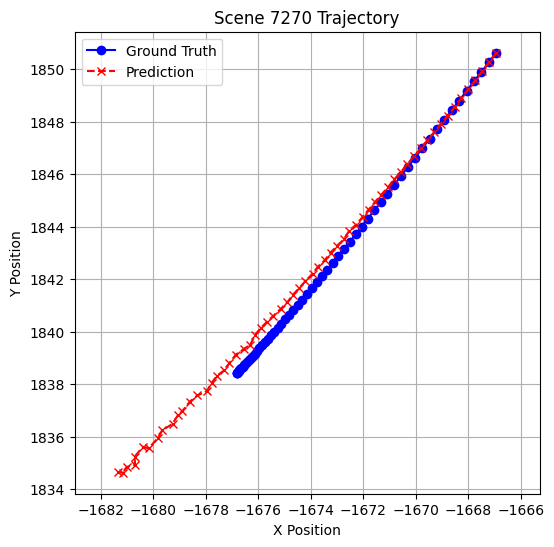

In [21]:
from utils import visualize_trajectory

# run this cell to visualize how the model's predicted trajectory compares to the real one on some data points
visualize_trajectory(train_dataset, lstm_model, np.random.randint(0, len(train_dataset)))